# Example: Load and visualize SynthMT dataset

This example demonstrates how to load the SynthMT dataset using the `datasets` library, decompose a sample into its image and masks, and visualize the masks overlaid on the image.

In [1]:
# Imports
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from skimage.color import label2rgb

## Load SynthMT Dataset
This may take a few minutes the first time as the dataset is downloaded. The second time it will load from cache. You can specify a custom cache directory by setting the `cache_dir` parameter in `load_dataset`. There are no splits in this dataset, so we load the "train" split as the full dataset.

In [2]:
# Load the SynthMT dataset
ds = load_dataset("HTW-KI-Werkstatt/SynthMT", split="train", cache_dir=None)

In [3]:
print(f"SynthMT dataset contains {len(ds)} samples.")

SynthMT dataset contains 6600 samples.


## Decompose and Visualize a Sample
Each sample in the dataset contains an image and a list of masks corresponding to different object instances.

In [4]:
# Take a sample and decompose it
sample_idx = 42
sample = ds[sample_idx]

image: Image.Image = sample["image"]
masks: list[Image.Image] = sample["mask"]

print(f"Sample {sample_idx}:")
print(f"  - Image size: {image.size}")
print(f"  - Number of masks: {len(masks)}")

Sample 42:
  - Image size: (512, 512)
  - Number of masks: 5


In [5]:
# Image as numpy array (H, W, 3)
img_array = np.array(image.convert("RGB"))

# Masks as stacked numpy array (N, H, W) where N is the number of instances
mask_stack = np.stack([np.array(mask.convert("L")) for mask in masks], axis=0)

print("Image shape:", img_array.shape)
print("Mask stack shape:", mask_stack.shape)

Image shape: (512, 512, 3)
Mask stack shape: (5, 512, 512)


Created labeled mask with 5 unique instances


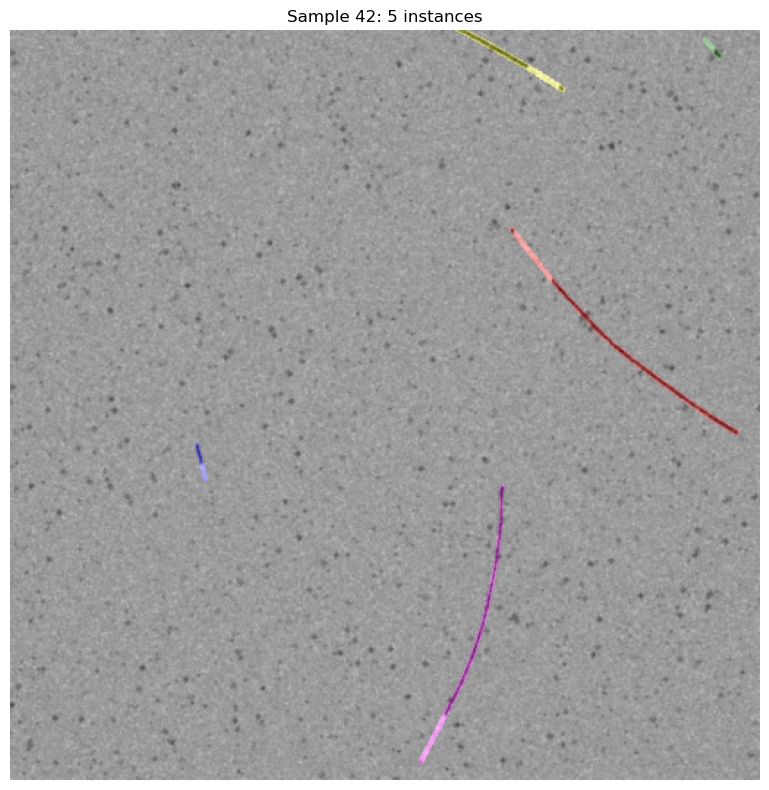

In [6]:
# Convert stack to single labeled mask (each instance gets unique ID)
height, width = img_array.shape[:2]
labeled_mask = np.zeros((height, width), dtype=np.int32)

# Dynamically iterate over all masks instead of hardcoding the count
for i, mask in enumerate(mask_stack):
    labeled_mask[mask > 0] = i + 1

print(f"Created labeled mask with {len(masks)} unique instances")

# Overlay on image
overlay = label2rgb(labeled_mask, image=img_array, bg_label=0, alpha=0.3)

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title(f"Sample {sample_idx}: {len(masks)} instances")
plt.axis('off')
plt.tight_layout()
plt.show()